In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from statistics import mean

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
for data in session:
    print(data)

In [11]:
prcp_2014 = session.query(Measurement.prcp).filter(Measurement.date > '2014-01-01', Measurement.date < '2014-12-31').all()

In [12]:
all_dates = session.query(Measurement.date).all()

In [13]:
prcp_date_sorted.plot(x='date', y='prcp')

NameError: name 'prcp_date_sorted' is not defined

# Exploratory Climate Analysis

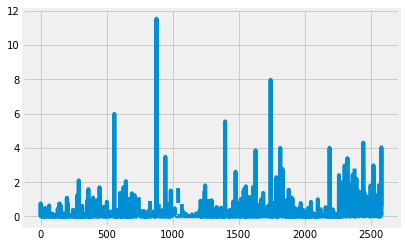

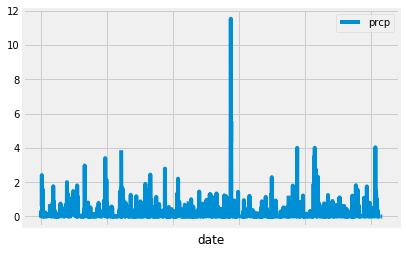

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
prcp_2014 = session.query(Measurement.prcp).filter(Measurement.date > '2014-01-01', Measurement.date < '2014-12-31').all()
plt.plot(prcp_2014)
# Calculate the date 1 year ago from the last data point in the database
all_dates = session.query(Measurement.date).all()
all_dates[-1]
# Perform a query to retrieve the data and precipitation scores
session.query(Measurement.prcp, Measurement.date).filter(Measurement.date > '2014-01-01', Measurement.date < '2014-12-31').all()
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_date_2014 = session.query(Measurement.prcp, Measurement.date).filter(Measurement.date > '2014-01-01', Measurement.date < '2014-12-31').all()
prcp_date_2014_df = pd.DataFrame(prcp_date_2014)
# Sort the dataframe by date
prcp_date_sorted = prcp_date_2014_df.sort_values(by="date")
# Use Pandas Plotting with Matplotlib to plot the data
prcp_date_sorted.plot(x='date', y='prcp')

![precipitation](Images/precipitation.png)

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_date_2014_df.describe()

,prcp
count,2391.000000
mean,0.178223
std,0.510151
min,0.000000
25%,0.000000
50%,0.020000
75%,0.140000
max,11.530000


![describe](Images/describe.png)

In [16]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Station.station).all()
len(stations)

9

In [17]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
meas_stations_df = pd.DataFrame(session.query(Measurement.station).all())
grouped_stations_df = meas_stations_df.groupby('station').size()
grouped_stations_df.sort_values(ascending=False)

station
USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
dtype: int64

In [18]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
top_station = session.query(Measurement.tobs).filter(Measurement.station=="USC00519281").all()
print(min(top_station))
print(max(top_station))
top_station_clean = []
for i in range (0, len(top_station)):
    top_station_clean.append(top_station[i][0])
top_station_clean.append(top_station[5][0])
print(mean(top_station_clean))

(54.0,)
(85.0,)
71.66534439235485


<function matplotlib.pyplot.show(*args, **kw)>

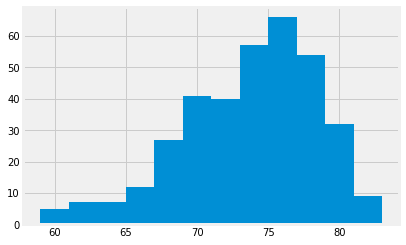

In [49]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
top_station_last_year = session.query(Measurement.tobs).filter(Measurement.station=="USC00519281", Measurement.date>='2016-08-18').all()
top_station_all_dates = session.query(Measurement.date).filter(Measurement.station=="USC00519281").all()
last_day = max(top_station_all_dates)
last_day_minus_year = '2016-08-18'
top_station_last_year = session.query(Measurement.tobs).filter(Measurement.station=="USC00519281", Measurement.date>='2016-08-18').all()
top_station_last_year_list = []
for i in range(0, len(top_station_last_year)):
    top_station_last_year_list.append(top_station_last_year[i][0])
plt.hist(top_station_last_year_list, bins=12)
plt.show

![precipitation](Images/station-histogram.png)

In [20]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [21]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2017-07-07', '2017-07-14'))

[(69.0, 77.94339622641509, 82.0)]


Text(0,0.5,'Temp (F)')

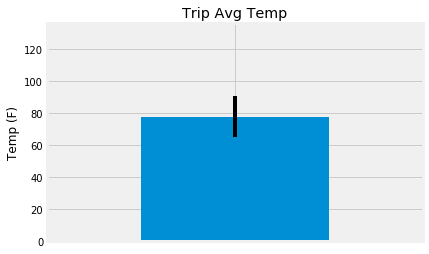

In [31]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.bar("", 77.9, yerr= 82-69, width=.1)
plt.margins(.5)
plt.title("Trip Avg Temp")
plt.ylabel("Temp (F)")

In [47]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
trip_rainfall_df = pd. DataFrame(session.query(Measurement.prcp, Measurement.station).filter(Measurement.date>='2017-07-07', Measurement.date>='2017-07-14').all())
trip_rainfall_by_station = trip_rainfall_df.groupby(by='station').sum()
station_df = pd.DataFrame(session.query(Station.station, Station.name, Station.latitude, Station.longitude).all())
station_trip_info = station_df.merge(trip_rainfall_by_station, on='station')
station_trip_info

,station,name,latitude,longitude,prcp
0,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,0.29
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,1.41
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,2.42
3,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,0.01
4,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,0.72
5,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,2.89
6,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,16.23


In [50]:
from flask import Flask
app = Flask(__name__)

In [60]:
date_prcp = session.query(Measurement.date, Measurement.prcp).all()
date_prcp_dict = dict((x, y) for x, y in date_prcp)

In [61]:
@app.route('/api/v1.0/precipitation')
def jsonified():
    return jsonify(date_prcp_dict)

In [63]:
@app.route('/api/v1.0/stations')
def stations():
    return stations

In [ ]:
@app.route('/api/v1.0/tobs')
def last_year():
    return top_station_last_year_list

In [64]:
@app.route('/api/v1.0/<start>')
def start_onward(start_date):
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).all()


In [65]:
@app.route('/api/v1.0/<start>/<end>')
def start_to_end(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


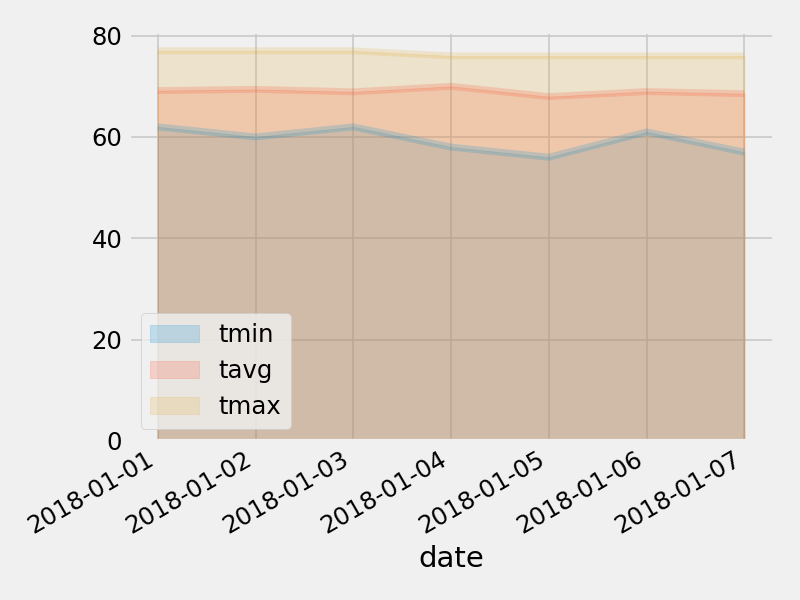

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
